### Example - Using Monopile or GBF Installation

This tutorial uses pre compiled ORBIT configs that are stored as .yaml files in the '~/configs/ folder. There are load and save methods available in ORBIT for working with .yaml files. 

This specific notebook runs the turbine and substructure installation of a project using different intallation methods: 
- Monopile and Turbine Installation (Heavy Lift Vessel for Monopile Installation, WTIV for Turbine Installation)
- Gravity-Based Foundation Intallation (Substructure-Turbine Assembly Tow-out, no WTIV)
- Gravity-Based Foundation and Turbine Intallation (Substructure Tow-out, WTIV for Turbine Installation)

In [1]:
import os
import pandas as pd
from ORBIT import ProjectManager, load_config
import copy

weather = pd.read_csv("data/example_weather.csv", parse_dates=["datetime"])\
            .set_index("datetime")

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

### Load the project configuration for the Gravity-Based Foundation Intallation (Substructure-Turbine Assembly Tow-out, no WTIV)
This configuration represents a substructure-turbine assembly tow-out using a gravity-based foundation, with no WTIV involved in the installation.

In [2]:
gbf_no_wtiv_config = load_config("configs/example_gravity-based_project.yaml") 

### Create a project configuration for the Gravity-Based Foundation and Turbine Intallation (Substructure Tow-out, WTIV for Turbine Installation)
This modified configuration uses a substructure assembly tow-out using a gravity-based foundation and a WTIV for turbine installation, while retaining all other inputs from the original Gravity-Based project setup.

In [3]:
# Create a copy to avoid modifying the original gbf_no_wtiv_config
gbf_with_wtiv_config = copy.deepcopy(gbf_no_wtiv_config)

# Add 'wtiv' key if not already set
if "wtiv" not in gbf_with_wtiv_config:
    gbf_with_wtiv_config["wtiv"] = "example_wtiv"

# Add 'TurbineInstallation' to install_phases if not already present
if "TurbineInstallation" not in gbf_with_wtiv_config["install_phases"]:
    gbf_with_wtiv_config["install_phases"]["TurbineInstallation"] = 0

### Create a project configuration for the Monopile and Turbine Installation (Heavy Lift Vessel for Monopile Installation, WTIV for Turbine Installation)
This modified configuration uses a Heavy Lift Vessel for monopile installation and a WTIV for turbine installation, while retaining all other inputs from the original Gravity-Based project setup.

In [4]:
# Create a copy to avoid modifying the original gbf_no_wtiv_config
monopile_config = copy.deepcopy(gbf_no_wtiv_config)

# Add 'wtiv' key if not already set
if "wtiv" not in monopile_config:
    monopile_config["wtiv"] = "example_wtiv"

# Add 'MonopileDesign' to design_phases if not already present
if "MonopileDesign" not in monopile_config["design_phases"]:
    monopile_config["design_phases"].append("MonopileDesign")

# Add 'MonopileInstallation' to install_phases if not already present
if "MonopileInstallation" not in monopile_config["install_phases"]:
    monopile_config["install_phases"]["MonopileInstallation"] = 0

# Add 'TurbineInstallation' to install_phases if not already present
if "TurbineInstallation" not in monopile_config["install_phases"]:
    monopile_config["install_phases"]["TurbineInstallation"] = 0

# Add 'ScourProtectionDesign' to design_phases if not already present
if "ScourProtectionDesign" not in monopile_config["design_phases"]:
    monopile_config["design_phases"].append("ScourProtectionDesign")

# Ensure 'scour_protection_design' exists
if "scour_protection_design" not in monopile_config:
    monopile_config["scour_protection_design"] = {}

# Set 'cost_per_tonne' only if not already defined
if "cost_per_tonne" not in monopile_config["scour_protection_design"]:
    monopile_config["scour_protection_design"]["cost_per_tonne"] = 40

# Add 'ScourProtectionInstallation' to install_phases if not already present
if "ScourProtectionInstallation" not in monopile_config["install_phases"]:
    monopile_config["install_phases"]["ScourProtectionInstallation"] = 0

# Remove 'GravityBasedInstallation' from install_phases if it exists
monopile_config["install_phases"].pop("GravityBasedInstallation", None)

0

### Each Project Has Different Installation Phases

The 'TurbineInstallation' module is only required for projects involving a WTIV. The 'GravityBasedInstallation' module offers flexibility—if a WTIV is not specified in the configuration file, it models the tow-out of a fully assembled substructure and turbine; if a WTIV is present, it models the tow-out of the substructure alone.


In [5]:
print(f"Monopile and Turbine Installation (Heavy Lift Vessel for Monopile Installation, WTIV for Turbine Installation)")
print(f"Install phases: {list(monopile_config['install_phases'].keys())}\n")
print(f"Gravity-Based Foundation Intallation (Substructure-Turbine Assembly Tow-out, no WTIV)")
print(f"Install phases: {list(gbf_no_wtiv_config['install_phases'].keys())}\n")
print(f"Gravity-Based Foundation and Turbine Intallation (Substructure Tow-out, WTIV for Turbine Installation)")
print(f"Install phases: {list(gbf_with_wtiv_config['install_phases'].keys())}\n")

Monopile and Turbine Installation (Heavy Lift Vessel for Monopile Installation, WTIV for Turbine Installation)
Install phases: ['ArrayCableInstallation', 'ExportCableInstallation', 'OffshoreSubstationInstallation', 'MonopileInstallation', 'TurbineInstallation', 'ScourProtectionInstallation']

Gravity-Based Foundation Intallation (Substructure-Turbine Assembly Tow-out, no WTIV)
Install phases: ['ArrayCableInstallation', 'ExportCableInstallation', 'GravityBasedInstallation', 'OffshoreSubstationInstallation']

Gravity-Based Foundation and Turbine Intallation (Substructure Tow-out, WTIV for Turbine Installation)
Install phases: ['ArrayCableInstallation', 'ExportCableInstallation', 'GravityBasedInstallation', 'OffshoreSubstationInstallation', 'TurbineInstallation']



### Run Three Cases

This project is always being modeled with the example weather project supplied that is representative of US East Coast wind farm locations.

In [6]:
project_monopile = ProjectManager(monopile_config, weather=weather)
project_monopile.run()

ORBIT library intialized at 'C:\esteyco-no-cost-extension\ORBIT\library'


landfall dictionary will be deprecated and moved into [export_system_design][landfall].DeprecationWarning: C:\esteyco-no-cost-extension\ORBIT\ORBIT\phases\install\cable_install\export.py:84
landfall dictionary will be deprecated and moved into [export_system][landfall].

In [7]:
project_gbf_no_wtiv = ProjectManager(gbf_no_wtiv_config, weather=weather)
project_gbf_no_wtiv.run()

support_vessel will be deprecated and replaced with towing_vessels and ahts_vessel in the towing groups.
['towing_vessl_groups]['station_keeping_vessels'] will be deprecated and replaced with ['towing_vessl_groups]['ahts_vessels'].


In [8]:
project_gbf_with_wtiv = ProjectManager(gbf_with_wtiv_config, weather=weather)
project_gbf_with_wtiv.run()

### CapEx Breakdown

In [9]:
# The breakdown of project costs by module is available  at 'capex_breakdown'

df = pd.DataFrame({
    'Monopiles + WTIV': pd.Series(project_monopile.capex_breakdown),
    'GBF-Turbine Assembly Tow-out': project_gbf_no_wtiv.capex_breakdown,
    'GBF Tow-out + WTIV': pd.Series(project_gbf_with_wtiv.capex_breakdown)
}).fillna(0)

# Add Total row
df.loc['Total'] = df.sum()

# Move index to a column
df = df.reset_index().rename(columns={'index': 'CapEx Component'})

# Create a copy for display with formatting (as strings)
df_display = df.copy()

# Format numeric columns with commas (leave 'CapEx Component' alone)
for col in df_display.columns[1:]:
    df_display[col] = df_display[col].apply(lambda x: f"{x:,.0f}")

# Save
df_display.to_csv("results/df_display.csv", index=False)

# Display the formatted version (but original df remains numeric)
df_display

,CapEx Component,Monopiles + WTIV,GBF-Turbine Assembly Tow-out,GBF Tow-out + WTIV
0,Array System,"50,455,757","50,455,757","50,455,757"
1,Array System Installation,"58,448,335","58,448,335","58,448,335"
2,Export System,"358,235,289","358,235,289","358,235,289"
3,Export System Installation,"24,502,082","24,502,082","24,502,082"
4,Offshore Substation,"307,307,330","307,307,330","307,307,330"
5,Offshore Substation Installation,"5,095,600","5,095,600","5,095,600"
6,Project,"185,582,083","185,582,083","185,582,083"
7,Scour Protection,"6,618,000",0,0
8,Scour Protection Installation,"14,748,989",0,0
9,Soft,"576,480,426","459,769,385","512,845,320"


In [10]:
def plot_capex_comparison(df, num_turbines, project_capacity_mw, top_limit=4000):
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import numpy as np

    # Clean column names and remove total row
    df.columns = df.columns.str.strip()
    df = df[~df['CapEx Component'].str.lower().str.contains('total')]

    # Melt to long format
    df_long = df.melt(id_vars='CapEx Component', var_name='Configuration', value_name='CapEx ($)')
    
    # Clean and convert CapEx values to float
    df_long['CapEx ($)'] = df_long['CapEx ($)'].replace(',', '', regex=True).astype(float)

    # Convert to million USD
    df_long['CapEx (Million USD)'] = df_long['CapEx ($)'] / 1e6

    # Pivot: Configuration as index, components as columns (Million USD)
    pivot_musd = df_long.pivot(index='Configuration', columns='CapEx Component', values='CapEx (Million USD)').fillna(0)

    # Set the order of configurations explicitly
    desired_order = ["Monopiles + WTIV", "GBF-Turbine Assembly Tow-out", "GBF Tow-out + WTIV"]
    pivot_musd = pivot_musd.reindex(desired_order)

    capacity_kw = project_capacity_mw * 1000

    # Colors for components
    colors = plt.get_cmap('tab20').colors
    component_order = pivot_musd.columns.tolist()
    color_map = {component: colors[i % len(colors)] for i, component in enumerate(component_order)}

    # Plot with black edges on bars
    fig, ax = plt.subplots(figsize=(14, 10))
    bottoms = np.zeros(len(pivot_musd))
    bar_width = 0.7  # Slightly thinner bars

    for comp in component_order:
        vals = pivot_musd[comp].values
        bars = ax.bar(pivot_musd.index, vals, bottom=bottoms, width=bar_width,
                      color=color_map[comp], edgecolor='black', linewidth=0.8, label=comp)
        # Update bottoms for next stack
        bottoms += vals

        # Add text inside each stacked segment if $/kW >= 40
        for i, val_musd in enumerate(vals):
            if val_musd == 0:
                continue
            val_usd = val_musd * 1e6
            val_per_kw = val_usd / capacity_kw
            val_per_wtg_musd = val_musd / num_turbines

            if val_per_kw >= 40:
                y_pos = bars[i].get_y() + bars[i].get_height() / 2
                text = (
                    f"${val_musd:,.1f}M | "
                    f"${val_per_kw:,.0f}/kW | "
                    f"${val_per_wtg_musd:,.2f}M/WTG"
                )
                ax.text(i, y_pos, text, ha='center', va='center', fontsize=8, color='black')

    # Add total values text on top of bars
    total_musd = pivot_musd.sum(axis=1)
    for i, total in enumerate(total_musd):
        total_usd = total * 1e6
        total_per_kw = total_usd / capacity_kw
        total_per_wtg_musd = total / num_turbines
        text = (
            f"Total:\n"
            f"${total:,.1f}M | "
            f"${total_per_kw:,.0f}/kW | "
            f"${total_per_wtg_musd:,.2f}M/WTG"
        )
        ax.text(i, total * 1.005, text, ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

    # Format y-axis ticks with commas
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

    plt.ylabel('CapEx ($ Million)', fontweight='bold')
    plt.xlabel('Configuration', fontweight='bold')
    plt.title('CapEx Breakdown by Component')
    plt.ylim(0, top_limit)
    plt.xticks()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.legend(title='CapEx Component', bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("results/capex_comparison.png", dpi=300)
    plt.show()


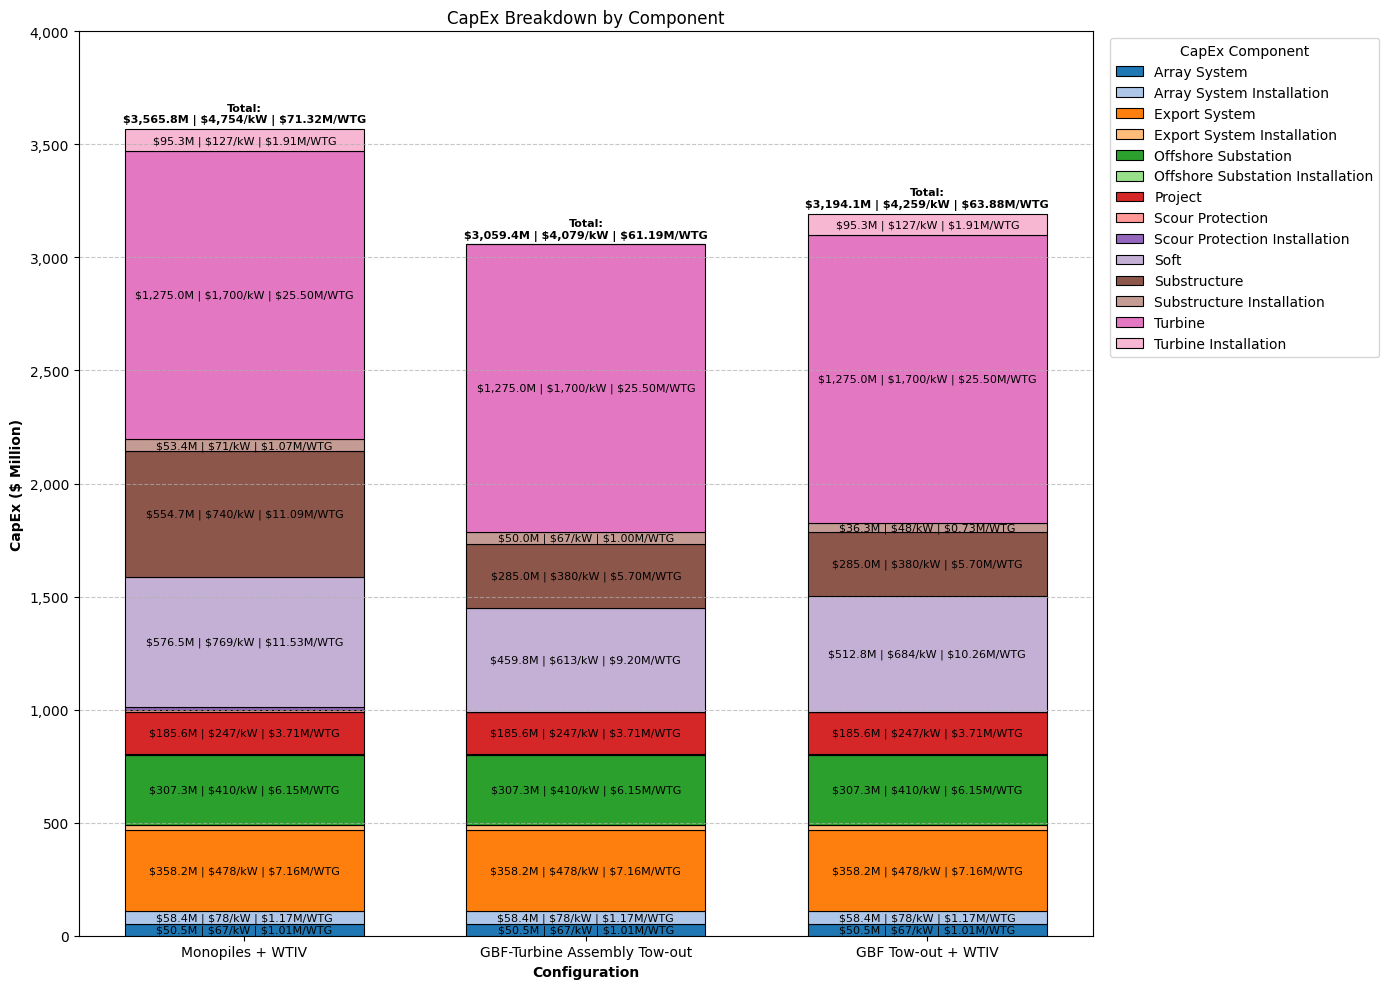

In [11]:
plot_capex_comparison(df_display, 50, 750, top_limit=4000)

### Substructure and Turbine Installation CapEx Breakdown

In [12]:
# Filter only the rows of interest
subset_df = df[df['CapEx Component'].isin(['Substructure Installation', 'Turbine Installation'])].copy()

# Add Total row (sum of these two rows)
total_row = {
    'CapEx Component': 'Total',
}
for col in subset_df.columns[1:]:
    total_row[col] = subset_df[col].sum()
subset_df = pd.concat([subset_df, pd.DataFrame([total_row])], ignore_index=True)

# Optional: format for display (with commas)
subset_display = subset_df.copy()
for col in subset_display.columns[1:]:
    subset_display[col] = subset_display[col].apply(lambda x: f"{x:,.0f}")

# Show formatted version
subset_display

,CapEx Component,Monopiles + WTIV,GBF-Turbine Assembly Tow-out,GBF Tow-out + WTIV
0,Substructure Installation,"53,356,403","50,003,907","36,343,554"
1,Turbine Installation,"95,293,403",0,"95,293,403"
2,Total,"148,649,807","50,003,907","131,636,958"


### Installation Actions

Save the installation sequences from each configuration file on a csv (just for substructure and turbine), and show total durations by installation step.

In [13]:
df = pd.DataFrame(project_monopile.actions)  
project_monopile_turbine_install = df.loc[df['phase']=="TurbineInstallation"]
project_monopile_turbine_install.to_csv("install_sequences/monopile_case_turbine_install.csv")
project_monopile_monopile_install = df.loc[df['phase']=="MonopileInstallation"]
project_monopile_monopile_install.to_csv("install_sequences/monopile_case_monopile_install.csv")

project_monopile_monopile_install.groupby(["action"]).sum()['duration']

action
Bolt TP                     200.000000
Crane Reequip               100.000000
Delay                       545.000000
Drive Monopile               75.000000
Fasten Monopile             600.000000
Fasten Transition Piece     400.000000
Jackdown                     21.666667
Jackup                       21.666667
Lower Monopile                0.250000
Lower TP                     50.000000
Mobilize                    168.000000
Position Onsite             100.000000
Release Monopile            150.000000
Release Transition Piece    100.000000
RovSurvey                    50.000000
Transit                     396.000000
Upend Monopile               40.816890
Name: duration, dtype: float64

In [14]:
df = pd.DataFrame(project_gbf_no_wtiv.actions)  
project_gbf_no_wtiv_turbine_install = df.loc[df['phase']=="TurbineInstallation"]
project_gbf_no_wtiv_turbine_install.to_csv("install_sequences/gbf_no_wtiv_case_turbine_install.csv")
project_gbf_no_wtiv_gbf_install = df.loc[df['phase']=="GravityBasedInstallation"]
project_gbf_no_wtiv_gbf_install.to_csv("install_sequences/gbf_no_wtiv_case_gbf_install.csv")

project_gbf_no_wtiv_gbf_install.groupby(["action"]).sum()['duration']

action
Delay                                                 4612.000000
Delay: No Assembly Storage Available                    38.115385
Delay: No Completed Assemblies Available              1645.620879
Delay: No Substructure Storage Available             10462.615385
Delay: Not enough vessels for gravity foundations     3213.736264
Electrical Completion                                 3600.000000
Grout GBF                                              300.000000
Lift and Attach Blade                                  525.000000
Lift and Attach Nacelle                                600.000000
Lift and Attach Tower Section                          400.000000
Mechanical Completion                                 1200.000000
Mobilize                                                72.000000
Move Substructure                                      400.000000
Position Substructure                                  250.000000
Positioning Support                                   2098.571429
Pre

In [15]:
df = pd.DataFrame(project_gbf_with_wtiv.actions)  
project_gbf_with_wtiv_turbine_install = df.loc[df['phase']=="TurbineInstallation"]
project_gbf_with_wtiv_turbine_install.to_csv("install_sequences/gbf_with_wtiv_case_turbine_install.csv")
project_gbf_with_wtiv_gbf_install = df.loc[df['phase']=="GravityBasedInstallation"]
project_gbf_with_wtiv_gbf_install.to_csv("install_sequences/gbf_with_wtiv_case_gbf_install.csv")

project_gbf_with_wtiv_gbf_install.groupby(["action"]).sum()['duration']

action
Delay                                                1137.000000
Delay: No Substructure Storage Available             8008.066935
Delay: Not enough vessels for gravity foundations    1884.615385
Grout GBF                                             300.000000
Mobilize                                               72.000000
Move GBF from Wet Storage to Assembly Storage           0.000000
Position Substructure                                 250.000000
Positioning Support                                  2345.571429
Pump Ballast                                          600.000000
ROV Survey                                             50.000000
Substructure Assembly                                   0.000000
Tow Substructure                                     1000.000000
Transit                                               940.219780
Name: duration, dtype: float64